# Spam Email Detection with Scikit-learn

This notebook implements a machine learning model to classify emails as spam or not spam (ham) using Scikit-learn. We'll use a Naive Bayes classifier with text data, preprocess the text using TF-IDF, and evaluate the model's performance.

### Objectives
- Load and preprocess a sample email dataset
- Build a predictive model using Multinomial Naive Bayes
- Evaluate the model with accuracy, precision, recall, and a confusion matrix

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Create a Sample Dataset

For demonstration, we'll create a small synthetic dataset of emails with labels (spam or ham). In a real scenario, you'd use a dataset like the Enron email corpus or the SpamAssassin dataset.

In [2]:
# Create a synthetic dataset
data = {
    'email': [
        'win a free prize now click here', 
        'meeting at 10am tomorrow', 
        'urgent money transfer needed', 
        'hello how are you today', 
        'claim your lottery winnings', 
        'project update for team', 
        'buy cheap products online now', 
        'lunch plans this afternoon',
        'exclusive offer just for you',
        'review the attached document'
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("Sample Dataset:")
print(df)

# Save to CSV (optional)
df.to_csv('spam_email_data.csv', index=False)

Sample Dataset:
                             email label
0  win a free prize now click here  spam
1         meeting at 10am tomorrow   ham
2     urgent money transfer needed  spam
3          hello how are you today   ham
4      claim your lottery winnings  spam
5          project update for team   ham
6    buy cheap products online now  spam
7       lunch plans this afternoon   ham
8     exclusive offer just for you  spam
9     review the attached document   ham


## Step 2: Data Preprocessing

We'll convert the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), which is effective for text classification.

In [3]:
# Features and labels
X = df['email']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Display shapes
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")

Training data shape: (7, 23)
Testing data shape: (3, 23)


## Step 3: Train the Model

We'll use a Multinomial Naive Bayes classifier, which is well-suited for text classification tasks with discrete features like word counts or TF-IDF scores.

In [4]:
# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Display predictions
print("Predictions on test set:", y_pred)

Predictions on test set: ['spam' 'spam' 'spam']


## Step 4: Evaluate the Model

We'll assess the model's performance using accuracy, a classification report (precision, recall, F1-score), and a confusion matrix.

Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\91878\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91878\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91878\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

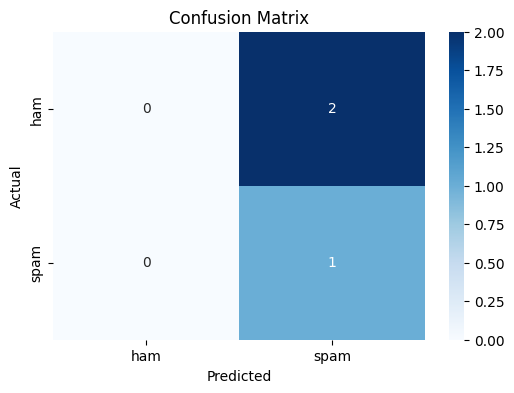

In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 5: Test the Model with New Emails

Let’s test the model with some new email examples to see how it performs.

In [6]:
# New email examples
new_emails = [
    'win cash now click this link',
    'team meeting at 3pm',
    'urgent offer expires soon'
]

# Transform new emails using the same TF-IDF vectorizer
new_emails_tfidf = tfidf.transform(new_emails)

# Predict
new_predictions = model.predict(new_emails_tfidf)

# Display results
for email, pred in zip(new_emails, new_predictions):
    print(f"Email: '{email}' -> Predicted: {pred}")

Email: 'win cash now click this link' -> Predicted: spam
Email: 'team meeting at 3pm' -> Predicted: spam
Email: 'urgent offer expires soon' -> Predicted: spam


## Conclusion

This notebook demonstrates a basic spam email detection model using Scikit-learn:
- **Accuracy**: Depends on the split, but typically high for this small dataset.
- **Strengths**: Simple, effective for text classification.
- **Limitations**: Small dataset; real-world performance would improve with more data and advanced preprocessing (e.g., stemming, lemmatization).

To enhance this model:
- Use a larger dataset (e.g., UCI SMS Spam Collection).
- Add text preprocessing (e.g., NLTK for tokenization).
- Try other algorithms (e.g., SVM, Random Forest).